In this exercise, we will perform CVA, DVA and FVA calculation for an unsecured vanila IRS.  

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Simulate short rate

We will use Vasicek Model  

$ \delta\ r(t)=k(\theta-r(t))\delta\ t+\sigma\ Z\sqrt\delta\ t $

In [2]:
# parameters

r_0 = 0.05
k = 0.1
theta = 0.05
sigma = 0.01

In [3]:
# Current Discount factors

DF_0 = pd.read_csv("TS.csv")
DF_0

,Tenor,DF
0,0.25,0.987578
1,0.50,0.975312
2,0.75,0.963201
3,1.00,0.951244
4,1.25,0.939441
5,1.50,0.927790
6,1.75,0.916291
7,2.00,0.904942
8,2.25,0.893741
9,2.50,0.882688


In [4]:
# Initial swap rate (fixed rate)

tau = 0.25    # year fraction 

s_0 = (1-DF_0.iloc[-1,-1])/(tau*DF_0['DF'].sum(axis=0))
s_0

0.04955143646427043

In [5]:
# Monte Carlo for Vasicek

def Vasicek(r_0, T, k, theta, sigma, nsims, nsteps):
    
    
    # time steps in columns, paths in rows 
    
    dt = T/nsteps
    
    np.random.seed(99)
    
    # Initialize r to 0
    r = np.zeros((nsims, nsteps + 1 ))
    
    #Setting the initial value of r = r0 for all rate paths 
    r[:,0] = r_0
    
    for i in range(nsteps):
        phi = np.random.randn(nsims)
        r[:,i+1] = r[:,i]+k*(theta-r[:,i])*dt + sigma*phi*np.sqrt(dt)
    
    return r

In [6]:
# swap parameters

N = 1000000    # notional
T = 10         # 10-Y swap

In [7]:
# Simulation parameters

nsims = 10000
nsteps = 40

In [8]:
# Monte Carlo paths for short rate under Vasicek

r_simulated = pd.DataFrame(Vasicek(r_0, T, k, theta, sigma, nsims, nsteps))
r_simulated

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.05,0.049288,0.040412,0.043659,0.037863,0.032590,0.035467,0.040666,0.042651,0.030338,...,0.042672,0.044797,0.048290,0.052661,0.056131,0.045527,0.051602,0.052025,0.052475,0.056698
1,0.05,0.060286,0.058868,0.064652,0.070762,0.071835,0.070609,0.059379,0.069778,0.066337,...,0.039307,0.041672,0.046435,0.038363,0.048190,0.045930,0.046148,0.051161,0.042717,0.048290
2,0.05,0.051416,0.044050,0.043986,0.048879,0.056504,0.060197,0.062365,0.059664,0.053530,...,0.026570,0.027286,0.026451,0.030902,0.022328,0.024813,0.019255,0.029271,0.028313,0.027573
3,0.05,0.056649,0.060472,0.061448,0.064559,0.069734,0.077178,0.073331,0.069547,0.070768,...,0.068780,0.064906,0.064894,0.059415,0.056336,0.066894,0.064045,0.066807,0.067789,0.069967
4,0.05,0.049227,0.056608,0.064474,0.069098,0.067085,0.069883,0.070999,0.057936,0.057654,...,0.054707,0.047302,0.045656,0.043780,0.048853,0.063335,0.067376,0.069605,0.068005,0.061299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.05,0.043251,0.051508,0.045397,0.041134,0.036970,0.036270,0.038847,0.034881,0.022992,...,0.015557,0.014984,0.012733,0.013036,0.017970,0.017401,0.009477,0.015571,0.020769,0.018416
9996,0.05,0.057977,0.055554,0.050465,0.056198,0.063199,0.062409,0.070343,0.067384,0.059975,...,0.042916,0.046977,0.046754,0.038526,0.036060,0.041839,0.042414,0.044205,0.036047,0.036328
9997,0.05,0.048643,0.049679,0.053352,0.054545,0.058605,0.052614,0.056665,0.052392,0.053251,...,0.067716,0.062753,0.064153,0.058268,0.056646,0.055285,0.054810,0.050160,0.051953,0.052433
9998,0.05,0.043671,0.044999,0.042121,0.046088,0.044118,0.048417,0.053284,0.056797,0.058071,...,0.079696,0.073717,0.072739,0.067148,0.078092,0.067993,0.069176,0.064058,0.064440,0.059349


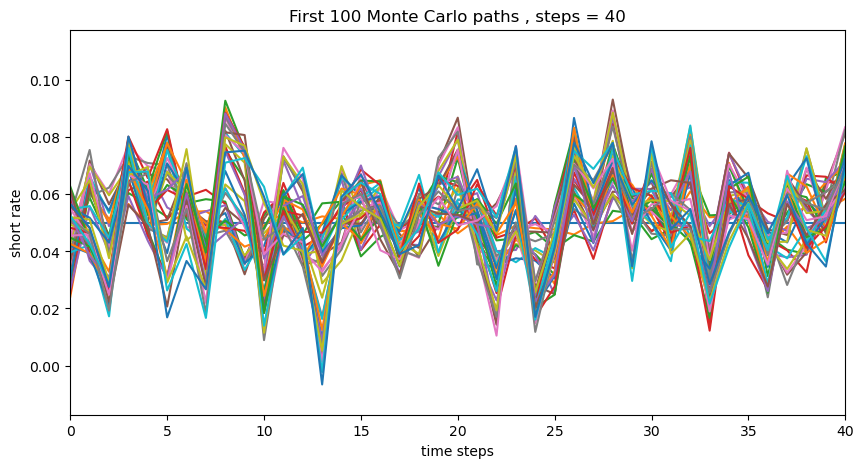

In [9]:
fig, ax = plt.subplots()

# Plot initial 100 simulated path using matplotlib
ax.plot(r_simulated.iloc[:100,:])
ax.set_xlabel('time steps')
ax.set_xlim(0,nsteps)
ax.set_ylabel('short rate')
ax.set_title('First 100 Monte Carlo paths , steps = 40');

fig.set_figheight(5)
fig.set_figwidth(10)

## 2 . Obtain simulated term structures / discount curve 

Vasicek Model allows us to calculate term structure / discount curve in closed form  

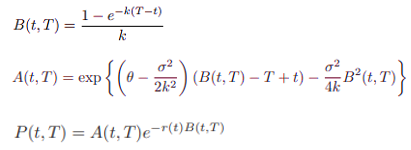

In [10]:
# Define a function to calculate Discount factor under Vasicek Model

def discount(r_t, t, T, k, theta, sigma ):
    
    B = (1-np.exp(-k*(T-t)))/k
    A = np.exp((theta-(sigma**2)/(2*(k**2)))*(B-T+t)-((sigma**2)/(4*k))*(B**2))
    P = A*np.exp(-r_t*B)
    
    return P

In [11]:
discount(r_0,0,0.5,k,theta,sigma)

0.9753118694764833

In [12]:
# Obtain simulated discount curve at each point in future, swap rates and value of the derivative

swap_rates = np.zeros((nsims, nsteps+1))
Exposure = np.zeros((nsims, nsteps+1))

swap_rates[:,0] = s_0
Exposure[:,0] = 0

for i in range(1, nsteps):
    T_array = np.arange(i+1,nsteps+1)
    DF = np.zeros((nsims, nsteps-i))
    for j in T_array:
        DF[:,j-i-1] = discount(r_simulated.iloc[:,i],i*tau,j*tau,k,theta,sigma)
    swap_rates[:,i] = (1-DF[:,-1])/(tau*DF.sum(axis=1))
    Exposure[:,i] = N*tau*(swap_rates[:,i]-s_0)*DF.sum(axis=1)

swap_rate_simulated = pd.DataFrame(swap_rates)
V = pd.DataFrame(Exposure)
V

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,-3498.319492,-49960.773986,-32016.130221,-61792.765733,-88814.057506,-72138.650387,-44455.143415,-33853.366206,-93979.118357,...,-12709.792711,-7746.271538,-1453.935345,4634.727865,7892.615794,-3462.851488,1693.436985,1352.699822,798.790819,0.0
1,0.0,51810.624590,44543.556538,71508.190286,98391.728366,101999.658125,95495.234505,44798.016542,89533.648679,73775.359477,...,-19285.461200,-13241.731903,-4337.478156,-14798.097359,-1187.205565,-3084.856152,-2201.058997,934.700560,-1611.456945,0.0
2,0.0,7478.707097,-30539.270597,-30309.801142,-4888.292145,32255.999733,49065.255177,58245.864215,45535.917275,17566.820274,...,-44581.429612,-38938.743524,-35939.687381,-25092.075327,-31347.398773,-23082.320510,-21629.909946,-9723.493997,-5179.841944,0.0
3,0.0,33905.319011,52298.424853,56482.677639,70368.311881,92782.068053,123493.863176,105871.574290,88556.417638,92392.255634,...,36859.842253,26890.903839,23977.984784,13682.248370,8125.479349,16376.982100,10521.778274,8483.422164,4569.717289,0.0
4,0.0,-3816.586986,33495.709356,70681.937645,90970.689889,81005.276642,92342.985316,95968.720308,37785.378309,36065.630206,...,10459.254430,-3364.007891,-5550.534408,-7391.271778,-426.117237,13100.612340,12871.725342,9827.208705,4622.826861,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-35378.565844,8036.422684,-22979.836482,-44534.262926,-65442.687461,-67949.403890,-53608.141481,-72492.025242,-132138.176594,...,-66973.443589,-61441.417728,-58218.414013,-50175.222169,-36518.939304,-30196.504664,-28787.200564,-16451.629343,-7053.844105,0.0
9996,0.0,40488.184550,28295.070071,2886.275712,31048.591347,63427.620596,59143.515703,93166.072113,79324.387695,46308.829866,...,-12233.147748,-3931.926198,-3842.060074,-14574.477653,-15220.222446,-6927.624579,-4876.234884,-2440.032614,-3262.436370,0.0
9997,0.0,-6855.124509,-1273.583034,17296.136784,23060.378542,42157.809199,13587.889843,32393.238834,12450.737496,16297.732051,...,34889.568341,23240.129097,22856.288311,12152.138086,8478.157775,5647.947559,3977.329017,449.702537,669.840276,0.0
9998,0.0,-33129.375074,-25539.000240,-40092.034198,-18978.426526,-28484.916847,-6678.043807,16686.098750,32637.959652,37915.114304,...,56838.162063,41680.801500,35763.012220,23938.269565,32570.855577,17386.857850,14139.626890,7161.106619,3746.101374,0.0


In [13]:
# Obtain Exposure Metrics

EFV = V.mean(axis = 0)
V_plus = np.maximum(V,0)
V_minus = np.minimum(V,0)
EE = V_plus.mean(axis=0)
ENE = V_minus.mean(axis=0)
PFE = np.quantile(V,0.95,axis=0)

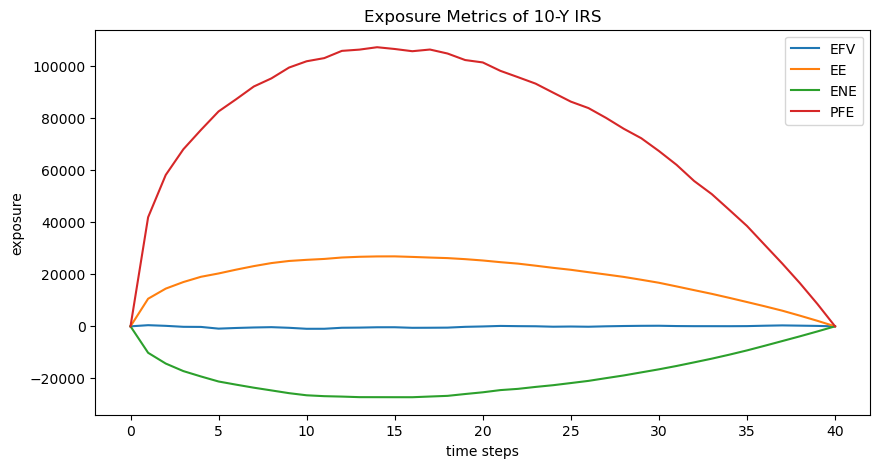

In [14]:
# Plot Exposure Metrics
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(EFV, label='EFV')  
ax.plot(EE, label='EE')  
ax.plot(ENE, label='ENE')
ax.plot(PFE, label='PFE')

ax.set_xlabel('time steps')  # Add an x-label to the axes.
ax.set_ylabel('exposure')  # Add a y-label to the axes.

ax.set_title("Exposure Metrics of 10-Y IRS")  # Add a title to the axes.

ax.legend(loc = 0);  # Add a legend.

## 3. Counterparty CDS & PD Term structure

We will use the CDS spread and recovery rate to construct the Marginal PD term structure   

$ \left[\mathrm{\Phi}\left(\tau>t_i\right)-\mathrm{\Phi}\left(\tau>t_{i+1}\right)\right]=e^{-\ \frac{spread\left(t_i\right)}{1-R}\ t_i}-e^{-\ \frac{spread\left(t_{i+1}\right)}{1-R}\ t_{i+1}} $

In [15]:
# Parameters

R_B = 0.6
R_C = 0.45

# read CDS spread

CDS_spread = pd.read_csv('CDS.csv')
CDS_spread

,time,B,C
0,0.25,0.0003,0.0012
1,0.50,0.0007,0.0016
2,0.75,0.0011,0.0020
3,1.00,0.0014,0.0022
4,1.25,0.0018,0.0023
5,1.50,0.0022,0.0027
6,1.75,0.0025,0.0030
7,2.00,0.0029,0.0036
8,2.25,0.0033,0.0041
9,2.50,0.0037,0.0043


In [16]:
# Calculate PD term structure and enhance the DataFrame 
df = CDS_spread.copy()

df['Survival_B'] = np.exp(-CDS_spread['B']*CDS_spread['time']/(1-R_B))
df['Survival_C'] = np.exp(-CDS_spread['C']*CDS_spread['time']/(1-R_C))

df['PD_B'] = (np.exp(-CDS_spread['B'].shift(1)*CDS_spread['time'].shift(1)/(1-R_B))
                      -np.exp(-CDS_spread['B']*CDS_spread['time']/(1-R_B)))

df['PD_B'][0] = (1-np.exp(-CDS_spread['B'][0]*CDS_spread['time'][0]/(1-R_B)))

df['PD_C'] = (np.exp(-CDS_spread['C'].shift(1)*CDS_spread['time'].shift(1)/(1-R_C))
                      -np.exp(-CDS_spread['C']*CDS_spread['time']/(1-R_C)))

df['PD_C'][0] = (1-np.exp(-CDS_spread['C'][0]*CDS_spread['time'][0]/(1-R_C)))

EE_1 = EE[1:]
ENE_1 = ENE[1:]

df['EE'] = EE
df['ENE'] = ENE
df['DF'] = DF_0['DF']

df['EE'] = df['EE'].shift(-1)
df['ENE'] = df['ENE'].shift(-1)

df.fillna(0, inplace = True)
df

,time,B,C,Survival_B,Survival_C,PD_B,PD_C,EE,ENE,DF
0,0.25,0.0003,0.0012,0.999813,0.999455,0.000187,0.000545,10612.232466,-10171.418459,0.987578
1,0.50,0.0007,0.0016,0.999125,0.998547,0.000687,0.000908,14499.616424,-14309.298731,0.975312
2,0.75,0.0011,0.0020,0.997940,0.997276,0.001186,0.001270,17024.818045,-17208.124342,0.963201
3,1.00,0.0014,0.0022,0.996506,0.996008,0.001434,0.001268,19049.880805,-19276.240803,0.951244
4,1.25,0.0018,0.0023,0.994391,0.994786,0.002115,0.001222,20327.748564,-21212.225596,0.939441
5,1.50,0.0022,0.0027,0.991784,0.992663,0.002607,0.002123,21798.945673,-22429.534976,0.927790
6,1.75,0.0025,0.0030,0.989122,0.990500,0.002662,0.002163,23152.707465,-23593.591395,0.916291
7,2.00,0.0029,0.0036,0.985605,0.986994,0.003517,0.003506,24321.332992,-24640.518171,0.904942
8,2.25,0.0033,0.0041,0.981609,0.983367,0.003996,0.003627,25132.587774,-25694.948763,0.893741
9,2.50,0.0037,0.0043,0.977140,0.980644,0.004468,0.002723,25568.876118,-26514.011148,0.882688


## 4. UCVA , BCVA 

$ UCVA\left(t\right)=(1-R_C)\sum_{i=0}^{N-1}\left[\mathrm{\Phi}\left(\tau>t_i\right)-\mathrm{\Phi}\left(\tau>t_{i+1}\right)\right]\left(\frac{{EE}_i{DF}_i+{EE}_{i+1}{DF}_{i+1}}{2}\right) $ 

$ BCVA\left(t\right)=\left(1-R_C\right)\sum_{i=0}^{N-1}\left[\mathrm{\Phi}\left(\tau_C>t_i\right)-\mathrm{\Phi}\left(\tau_C>t_{i+1}\right)\right]\mathrm{\Phi}\left[\tau_B>t_{i+1}\right]\left(\frac{{EE}_i{DF}_i+{EE}_{i+1}{DF}_{i+1}}{2}\right)+
(1-R_B)\sum_{i=0}^{N-1}\left[\mathrm{\Phi}\left(\tau_B>t_i\right)-\mathrm{\Phi}\left(\tau_B>t_{i+1}\right)\right]\mathrm{\Phi}\left[\tau_C>t_{i+1}\right]\left(\frac{{ENE}_i{DF}_i+{ENE}_{i+1}{DF}_{i+1}}{2}\right) $

In [17]:
UCVA = np.sum((1-R_C)*df['EE']*df['DF']*df['PD_C'])
UCVA

1988.0192247238465

In [18]:
BCVA = np.sum((1-R_C)*df['EE']*df['DF']*df['PD_C']*df['Survival_B']) + np.sum((1-R_B)*df['ENE']*df['DF']*df['PD_B']*df['Survival_C'])

BCVA

211.9608875607537

## 5. FCA

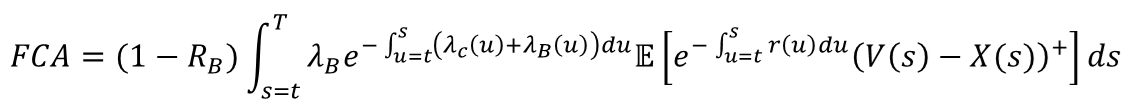

In [19]:
FCA = np.sum((1-R_B)*df['EE']*df['DF']*df['PD_B']*df['Survival_C'])
FCA

1536.2367940310464